In [53]:
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

import os, sys, h5py, json
from importlib import reload

sys.path.append('C:/Users/richy/OneDrive/Bureau/prog/jupyternb/')

import fidle.pwk as pwk

In [54]:
vocab_size = 10000
hide_most_frequently = 0

epochs = 20
batch_size = 512

In [55]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data( num_words=vocab_size, skip_top=hide_most_frequently)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

print(pwk.rmax([x_train, x_test]))
print(pwk.rmin([x_train, x_test]))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

9999
1
(25000,) (25000,)
(25000,) (25000,)


In [56]:
print(x_train[11])
print(y_train[11])

[1, 54, 13, 1610, 14, 20, 13, 69, 55, 364, 1398, 21, 54, 13, 219, 12, 13, 1706, 15, 4, 20, 16, 329, 6, 176, 329, 74, 51, 13, 873, 4, 156, 71, 78, 4, 7412, 322, 16, 31, 7, 4, 249, 4, 65, 16, 38, 379, 12, 100, 157, 18, 6, 910, 20, 549, 18, 4, 1496, 21, 14, 31, 9, 24, 6, 212, 12, 9, 6, 1322, 991, 7, 3002, 4, 425, 9, 73, 2218, 549, 18, 31, 155, 36, 100, 763, 379, 20, 103, 351, 5308, 13, 202, 12, 2241, 5, 6, 320, 46, 7, 457]
0.0


In [57]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {w:(i+3) for w,i in word_index.items()}
word_index.update({'<pad>':0, '<start>':1, '<unknown>':2, '<undef>':3,})

index_word = {index:word for word,index in word_index.items()}

print(len(word_index))
for k in range(0, 45):
    print(f'{k:2d} : {index_word[k]}')

def dataset2text(review):
    return ' '.join([index_word.get(i, '?') for i in review])

88588
 0 : <pad>
 1 : <start>
 2 : <unknown>
 3 : <undef>
 4 : the
 5 : and
 6 : a
 7 : of
 8 : to
 9 : is
10 : br
11 : in
12 : it
13 : i
14 : this
15 : that
16 : was
17 : as
18 : for
19 : with
20 : movie
21 : but
22 : film
23 : on
24 : not
25 : you
26 : are
27 : his
28 : have
29 : he
30 : be
31 : one
32 : all
33 : at
34 : by
35 : an
36 : they
37 : who
38 : so
39 : from
40 : like
41 : her
42 : or
43 : just
44 : about


In [58]:
print(dataset2text(x_train[11]))

<start> when i rented this movie i had very low expectations but when i saw it i realized that the movie was less a lot less than what i expected the actors were bad the doctor's wife was one of the worst the story was so stupid it could work for a disney movie except for the murders but this one is not a comedy it is a laughable masterpiece of stupidity the title is well chosen except for one thing they could add stupid movie after dead husbands i give it 0 and a half out of 5


In [59]:
def one_hot_encoder(x, vector_size=10000):
    x_encoded = np.zeros((len(x), vector_size))
    for i, sentence in enumerate(x):
        for word in sentence:
            x_encoded[i, word] = 1
    return x_encoded


In [60]:
x_train = one_hot_encoder(x_train)
x_test = one_hot_encoder(x_test)

x_train[11]

array([0., 1., 0., ..., 0., 0., 0.])

In [67]:
def get_model(vector_size=10000):
    model = keras.Sequential()
    model.add(keras.layers.Input( shape=(vector_size,)))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = get_model(vector_size=vocab_size)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                320032    
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 321121 (1.22 MB)
Trainable params: 321121 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/20
49/49 [==============================] - 2s 40ms/step - loss: 0.6216 - accuracy: 0.6973 - val_loss: 0.5086 - val_accuracy: 0.7966
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.5051 - accuracy: 0.7594 - val_loss: 0.4039 - val_accuracy: 0.8348
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.4153 - accuracy: 0.8142 - val_loss: 0.3507 - val_accuracy: 0.8532
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3707 - accuracy: 0.8394 - val_loss: 0.3369 - val_accuracy: 0.8584
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3489 - accuracy: 0.8531 - val_loss: 0.3626 - val_accuracy: 0.8392
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3276 - accuracy: 0.8602 - val_loss: 0.3979 - val_accuracy: 0.8170
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3014 - accuracy: 0.8732 - val_loss: 0.2991 - val_accuracy: 0.8749
Epoch 8/20
49

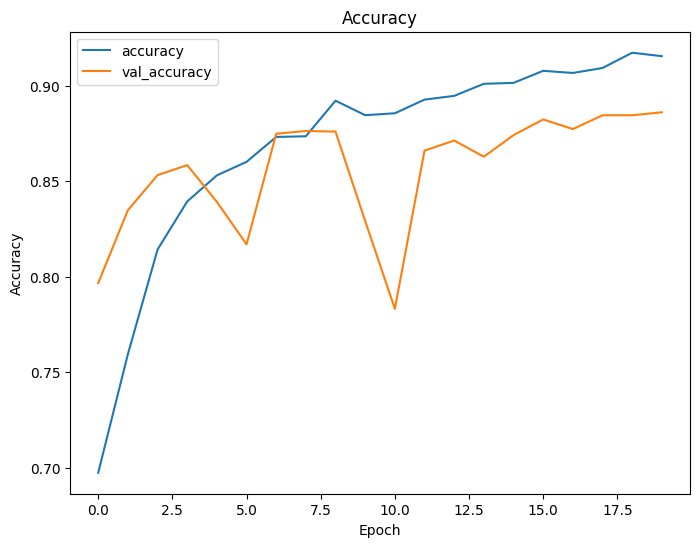

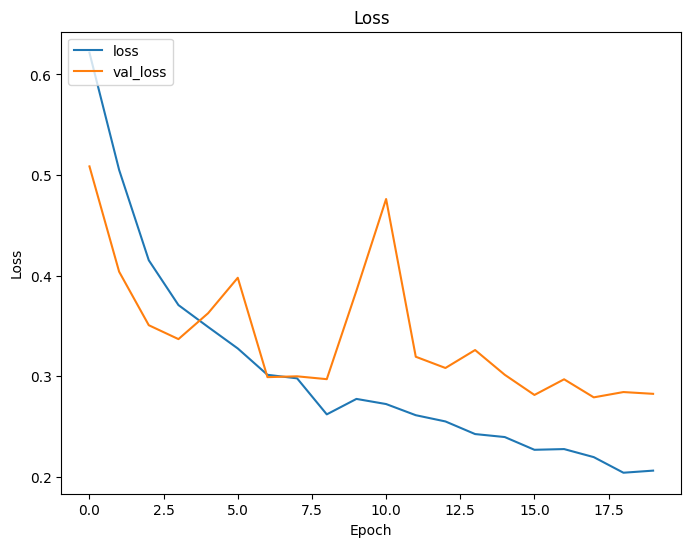

In [69]:
pwk.plot_history(history)

In [70]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.28249499201774597, 0.8861200213432312]

In [72]:
y_sigmoid = model.predict(x_test)

y_pred = y_sigmoid.copy()
y_pred[y_sigmoid < 0.5] = 0
y_pred[y_sigmoid >= 0.5] = 1

782/782 [==============================] - 1s 1ms/step


array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

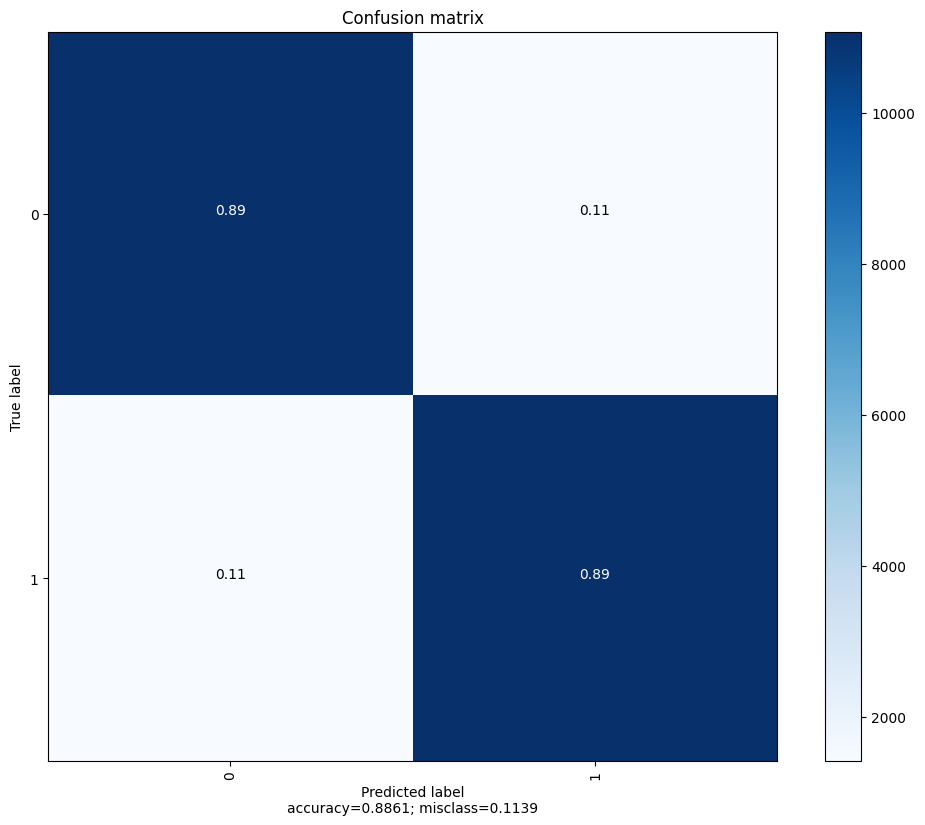

In [73]:
pwk.plot_confusion_matrix(y_test, y_pred, range(2))